In [1]:
!pip install git+https://github.com/wahabaftab/micrograd.git


  Cloning https://github.com/wahabaftab/micrograd.git to /private/var/folders/7t/td9dgswx18q4h8f0bpcksz2c0000gn/T/pip-req-build-93cxdni2
  Running command git clone --filter=blob:none --quiet https://github.com/wahabaftab/micrograd.git /private/var/folders/7t/td9dgswx18q4h8f0bpcksz2c0000gn/T/pip-req-build-93cxdni2
  Resolved https://github.com/wahabaftab/micrograd.git to commit 849d1ba4e797fc1093849969e75e3af0265f03ae
  Preparing metadata (setup.py) ... done


In [2]:
from micrograd.engine import Value
from micrograd import nn
from micrograd.graph import visualize_graph


### Computing and Visualizing a Computational Graph for a Simple Neural Unit

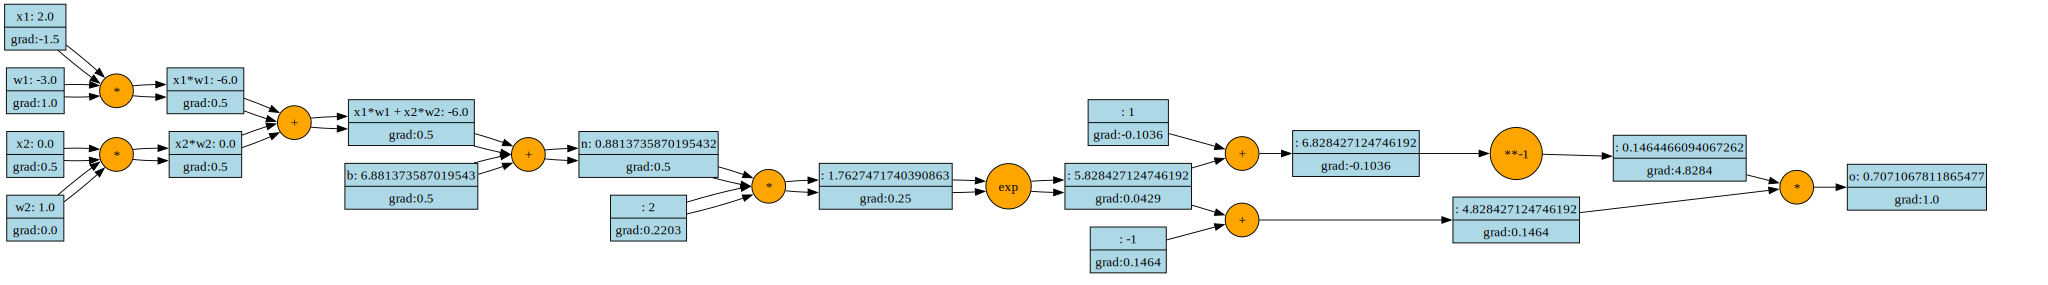

In [31]:
x1= Value(2.0, label='x1')
x2= Value(0.0, label='x2')

w1= Value(-3.0, label='w1')
w2= Value(1.0, label='w2')

b= Value(6.8813735870195432, label='b')

x1w1= x1*w1
x1w1.label='x1*w1'
x2w2= x2*w2
x2w2.label='x2*w2'

x1w1x2w2= x1w1 + x2w2
x1w1x2w2.label='x1*w1 + x2*w2'

n= x1w1x2w2 + b
n.label='n'

#o=n.tanh()
e=(2*n).exp()
o = (e - 1) / (e + 1)

o.label='o'

o.backprop()
graph = visualize_graph(o)
display(graph)

### Computing and Visualizing a Computational Graph for a Multi-Layer Perceptron (MLP) 

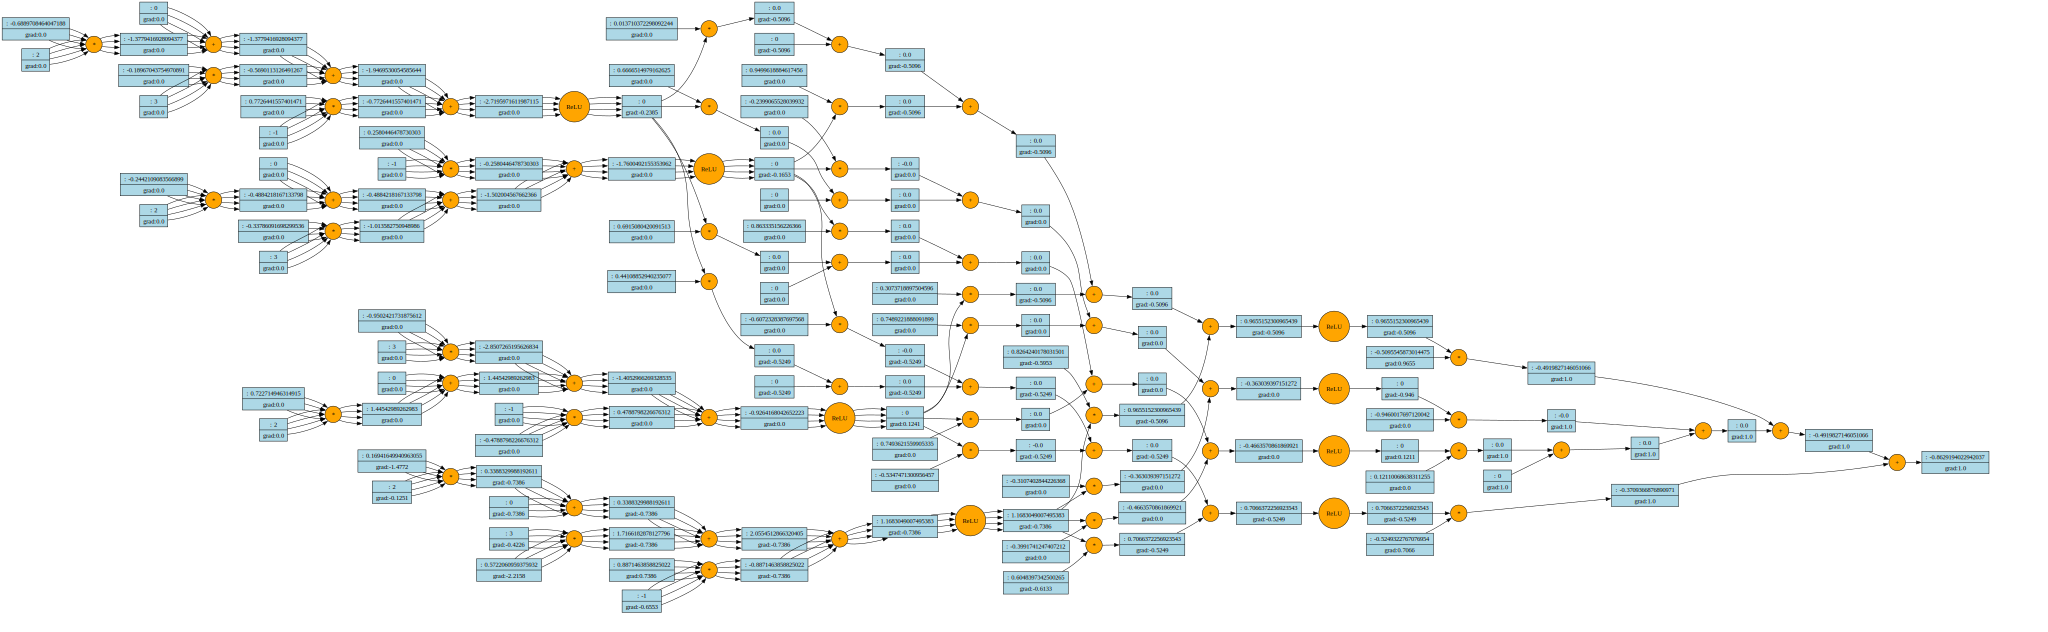

In [32]:
from micrograd.nn import MLP

x=[2,3,-1]
n=MLP(3,[4,4,1])
o=n(x)

o.backprop()
graph = visualize_graph(o)
display(graph)

### Training a simple Multi-Layer Perceptron (MLP) Using Forward and Backward Pass 









In [33]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

n=MLP(3,[4,4,1])


for i in range(250):
  losses=[]
  # forward pass
  ypred = [n(x) for x in xs]

  for i,j in zip(ypred,ys):
    losses.append((i-j)**2)

  loss=sum(losses)
  print(loss)

  for p in n.parameters():
    p.grad=0

  #backward pass
  loss.backprop()

  for p in n.parameters():
    p.data =p.data - 0.01*(p.grad)




Value(data=8.051869246186744)
Value(data=3.820959144650538)
Value(data=3.397818667272785)
Value(data=3.120400768502506)
Value(data=2.8795764749852193)
Value(data=2.6636013419240694)
Value(data=2.466830091843559)
Value(data=2.285996953265025)
Value(data=2.1192888281761606)
Value(data=1.9657693653332418)
Value(data=1.824959768702163)
Value(data=1.696518782354541)
Value(data=1.5790570619812463)
Value(data=1.3348892768077194)
Value(data=1.1678196937883862)
Value(data=1.0256811478890386)
Value(data=0.90434434284292)
Value(data=0.8005377870321886)
Value(data=0.7115538470366941)
Value(data=0.6352421189466353)
Value(data=0.5707428962185168)
Value(data=0.5169199898276694)
Value(data=0.47586516185931904)
Value(data=0.4472611232494521)
Value(data=0.44019631267571757)
Value(data=0.45436744524277867)
Value(data=0.5198940606994367)
Value(data=0.6276944525788338)
Value(data=0.8728078699961734)
Value(data=1.1635291499530065)
Value(data=1.761365919759945)
Value(data=2.071582151783411)
Value(data=2.4747

In [29]:
print('Original:',ys)
print('Predictions:',[i.data for i in ypred])
print('Final Loss:',loss.data)


Original: [1.0, -1.0, -1.0, 1.0]
Predictions: [1.0015198405926546, -0.9996666610259923, -0.9951266547311322, 0.9980799745040289]
Final Loss: 2.985702231344916e-05
